# Imports

In [1]:
import pandas as pd
import json
import os
import numpy as np
#from load_balance.post_process import plot_box_latency, plot_box_ex_time,plot_box_queu_wait_time,plot_box_queu_wait_time_int,plot_box_latency_int,get_time_outs,extract_qs
from load_balance.post_process import *
import seaborn as sns
sns.set_theme(palette='pastel',color_codes = True)
import matplotlib.pyplot as plt
import ast


In [33]:
#Common calculations
#oracle = 2876
#plan= 2479
#print(f"PlanRGCN Oracle throughput deviation: {(oracle-plan)/oracle}")
#oracle = 5578
#plan= 5749
#print(f"PlanRGCN Oracle throughput deviation: {(oracle-plan)/oracle}")

PlanRGCN Oracle throughput deviation: 0.13803894297635605
PlanRGCN Oracle throughput deviation: -0.030656149157404087


# Wikidata

In [4]:

base = '/data/wikidata_0_1_10_v2_weight_loss'
#pathFIFOMU22 = f'{base}/load_balance_FIFO_22_10_worker'
pathFIFOMU44 = f'{base}/load_balanceFIFO44_10'


#pathPlan22 = f'{base}/load_balance_PlanRGCN_22_12workser'
pathPlan44 = f'{base}/load_balancePlanRGCN44_10'

#pathOracle22 = f'{base}/load_balance_Oracle_22_10workers'
pathOracle44 = f'{base}/load_balanceOracle44_10'

pathNN44 = f'{base}/load_balanceNN44'

pathSVM44 = f'{base}/load_balanceSVM44'

In [6]:

path_data = {
    'FIFO (μ=44)': pathFIFOMU44, 
    'PlanRGCN (μ=44)': pathPlan44, 
    'Oracle (μ=44)': pathOracle44, 
    'SVM-based (μ=44)': pathSVM44, 
    'NN-based (μ=44)': pathNN44, 
}
from load_balance.post_process import get_overview_table
print(get_overview_table(path_data).to_latex())

\begin{tabular}{lrr}
\toprule
 & Good Queries & Time out \\
\midrule
FIFO (μ=44) & 1402 & 9 \\
PlanRGCN (μ=44) & 3695 & 7 \\
Oracle (μ=44) & 3214 & 8 \\
SVM-based (μ=44) & 3619 & 12 \\
NN-based (μ=44) & 2961 & 12 \\
\bottomrule
\end{tabular}



In [7]:

#fifo22, fifo_timed22 = extract_qs(pathFIFOMU22)
fifo44, fifo_timed44 = extract_qs(pathFIFOMU44)

#mu22, mu22_timed = extract_qs(pathPlan22)
mu44, mu44_timed = extract_qs(pathPlan44)

#or22, or22_timed = extract_qs(pathOracle22)
or44, or44_timed = extract_qs(pathOracle44)

SVM44, SVM44_timed = extract_qs(pathSVM44)
NN44, NN44_timed = extract_qs(pathNN44)

wikidata = {
    'FIFO (μ=44)': fifo44, 
    'PlanRGCN (μ=44)': mu44, 
    'Oracle (μ=44)': or44, 
    'SVM-based (μ=44)': SVM44, 
    'NN-based (μ=44)': NN44, 
}

In [8]:

get_time_outs(wikidata)

Time outs
FIFO (μ=44) Timeouts : 9
PlanRGCN (μ=44) Timeouts : 7
Oracle (μ=44) Timeouts : 8
SVM-based (μ=44) Timeouts : 12
NN-based (μ=44) Timeouts : 12


{'FIFO (μ=44)': 9,
 'PlanRGCN (μ=44)': 7,
 'Oracle (μ=44)': 8,
 'SVM-based (μ=44)': 12,
 'NN-based (μ=44)': 12}

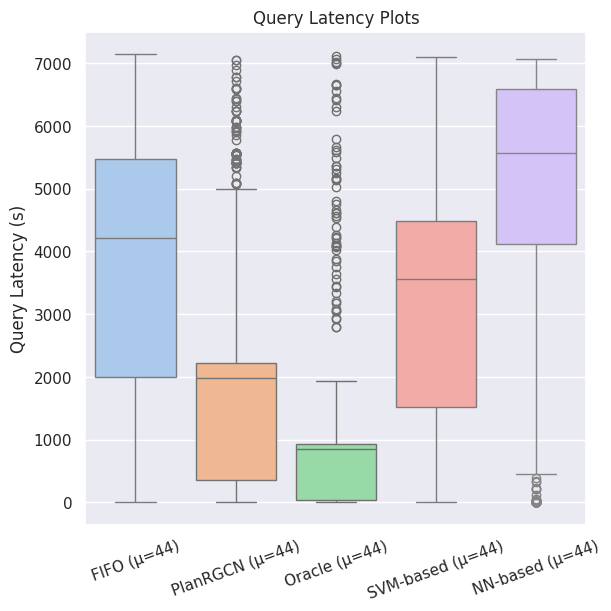

In [9]:

def plot_box_latency(dct, figsize=(6,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    for k in dct.keys():
        ax = sns.boxplot(y=[q['latency'] for q in dct[k]],x=[k for q in dct[k]], ax=ax)
    #ax = sns.boxplot(y=[q['latency'] for q in qpp_lb],x=['PlanRGCN Load Balancer' for q in qpp_lb], ax=ax)
    ax.set_ylabel('Query Latency (s)')
    ax.set_title("Query Latency Plots")
    ax.tick_params(axis='x', rotation=20)
    plt.show()
    
plot_box_latency(wikidata)

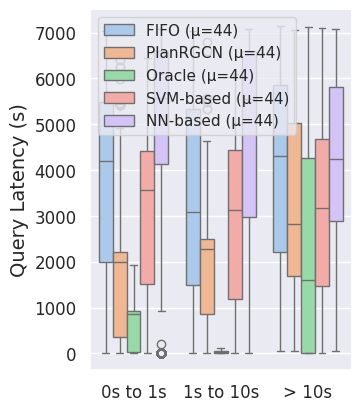

In [11]:

plot_box_latency_int(wikidata, title='',time_intervals=['0s to 1s', '1s to 10s', '> 10s'], figsize=(3.5,4))

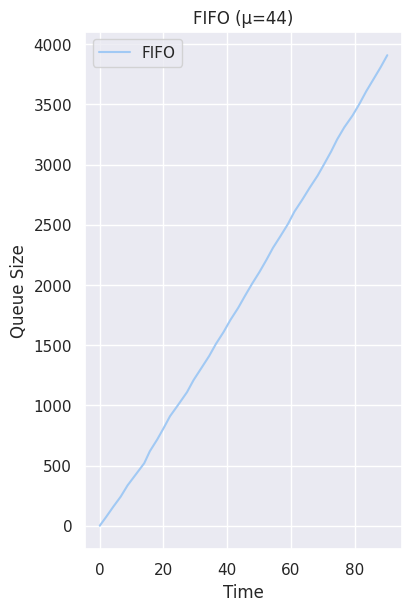

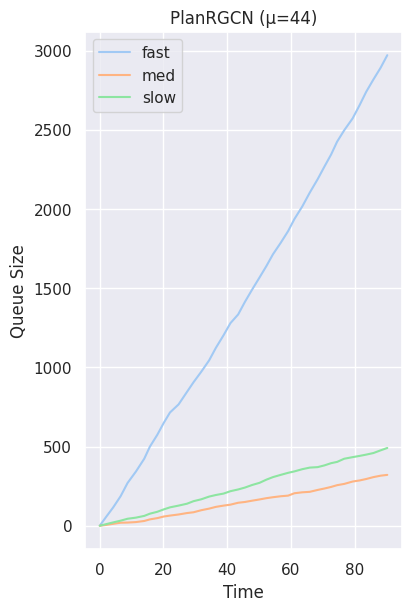

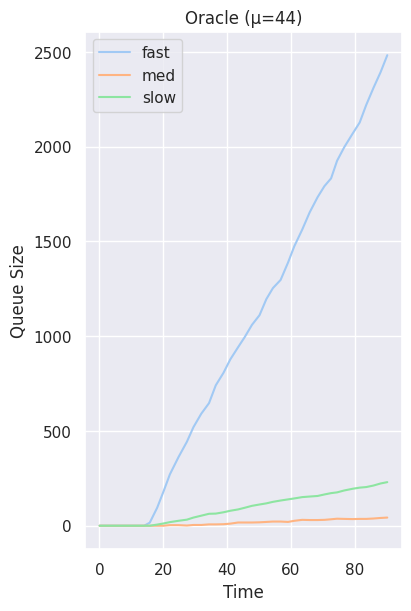

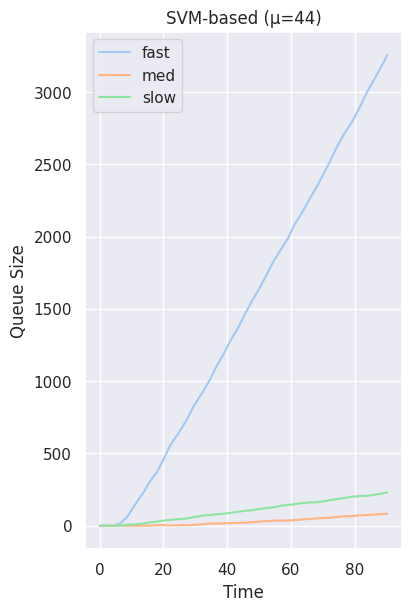

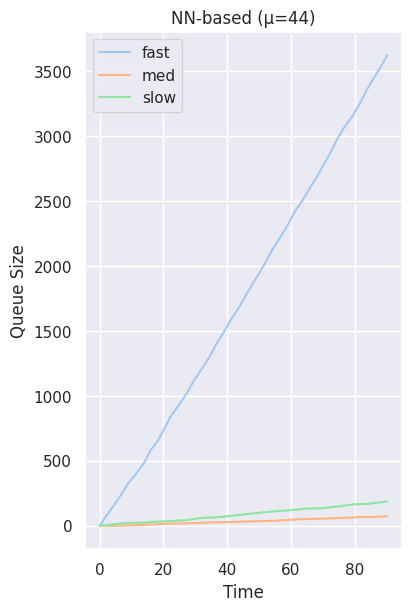

In [12]:

def get_queu_size(path):
    data = []
    for line in open(f'{path}/main_file.log').readlines():
        if '{' in line:
            data.append( ast.literal_eval('{'+line.split('{')[1]))
    return data
    
def plot_queu_size_helper(q_data, figsize=(4,6), title=None):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    try:
        for k in ['fast', 'med', 'slow']:
            ax = sns.lineplot(y=[q[k] for q in q_data], x=[q['time'] for q in q_data] , ax=ax, label=k)
    except:
        ax = sns.lineplot(y=[q['fifo'] for q in q_data], x=[q['time'] for q in q_data] , ax=ax, label='FIFO')
        
    ax.set_ylabel('Queue Size')
    ax.set_xlabel('Time')
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_queu_size(path, figsize=(4,6), title=None):
    q_data = get_queu_size(path)
    plot_queu_size_helper(q_data, figsize=figsize, title=title)

for k in path_data.keys():
    plot_queu_size(path_data[k], title = k)

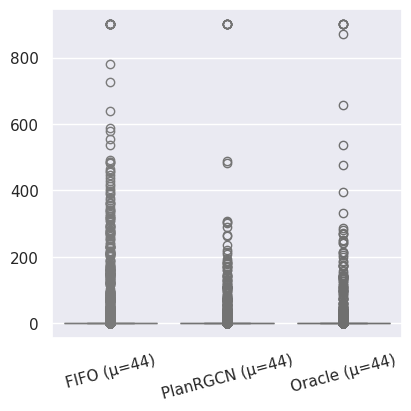

In [13]:
plot_box_ex_time(wikidata)

# DBpedia

In [13]:
from load_balance.post_process import extract_qs

In [56]:
base = "/data/DBpedia2016_0_1_10_weight_loss"
pathFIFOMU44 = f'{base}/load_balance_FIFO_44_10_workers'
pathPlan44 = f'{base}/load_balance_PlanRGCN_44_10_workers'
pathOracle44 = f'{base}/load_balance_Oracle_44_10_workers'
pathSVM44 = f'{base}/load_balance_SVM_44_10_workers'
pathNN44 = f'{base}/load_balance_NN_44_10_workers'

pathFIFOMU44 = f'{base}/LB21/load_balance_FIFO_44_10_workers'
pathPlan44 = f'{base}/LB21/load_balance_PlanRGCN_44_10_workers'
pathOracle44 = f'{base}/LB21/load_balance_Oracle_44_10_workers'
pathSVM44 = f'{base}/LB21/load_balance_SVM_44_10_workers'
pathNN44 = f'{base}/LB21/load_balance_NN_44_10_workers'

In [57]:
path_data = {
    'FIFO (μ=44)': pathFIFOMU44, 
    'PlanRGCN (μ=44)': pathPlan44, 
    'Oracle (μ=44)': pathOracle44, 
    'SVM-based (μ=44)': pathSVM44, 
    'NN-based (μ=44)': pathNN44, 
}
from load_balance.post_process import get_overview_table
print(get_overview_table(path_data).to_latex())

\begin{tabular}{lrr}
\toprule
 & Good Queries & Time out \\
\midrule
FIFO (μ=44) & 569 & 62 \\
PlanRGCN (μ=44) & 1805 & 40 \\
Oracle (μ=44) & 2204 & 14 \\
SVM-based (μ=44) & 1202 & 51 \\
NN-based (μ=44) & 1686 & 62 \\
\bottomrule
\end{tabular}



In [16]:


fifo44, fifo_timed44 = extract_qs(pathFIFOMU44)


mu44, mu44_timed = extract_qs(pathPlan44)


or44, or44_timed = extract_qs(pathOracle44)
NN44, NN44_timed = extract_qs(pathNN44)
SVM44, SVM44_timed = extract_qs(pathSVM44)

dbpedia = {
    'FIFO (μ=44)': fifo44, 
    'PlanRGCN (μ=44)': mu44, 
    'Oracle (μ=44)': or44, 
    'SVM-based (μ=44)': SVM44, 
    'NN-based (μ=44)': NN44, 
}

In [17]:
from load_balance.post_process import get_time_outs
get_time_outs(dbpedia)

Time outs
FIFO (μ=44) Timeouts : 61
PlanRGCN (μ=44) Timeouts : 43
Oracle (μ=44) Timeouts : 11
SVM-based (μ=44) Timeouts : 53
NN-based (μ=44) Timeouts : 61


{'FIFO (μ=44)': 61,
 'PlanRGCN (μ=44)': 43,
 'Oracle (μ=44)': 11,
 'SVM-based (μ=44)': 53,
 'NN-based (μ=44)': 61}

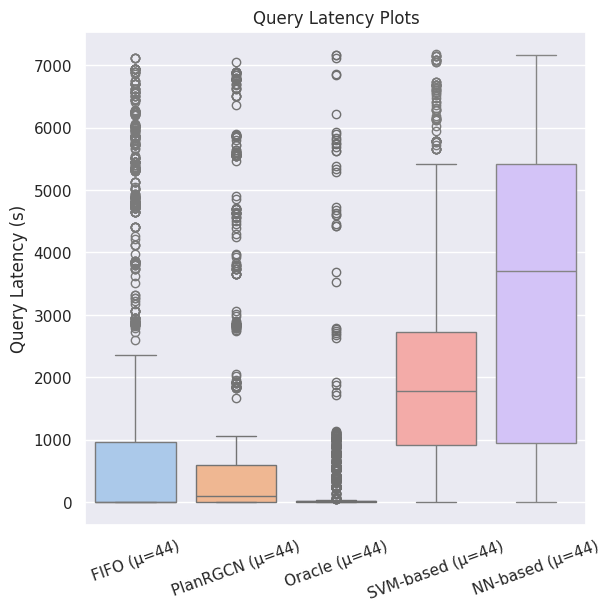

In [18]:

def plot_box_latency(dct, figsize=(6,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    for k in dct.keys():
        ax = sns.boxplot(y=[q['latency'] for q in dct[k]],x=[k for q in dct[k]], ax=ax)
    #ax = sns.boxplot(y=[q['latency'] for q in qpp_lb],x=['PlanRGCN Load Balancer' for q in qpp_lb], ax=ax)
    ax.set_ylabel('Query Latency (s)')
    ax.set_title("Query Latency Plots")
    ax.tick_params(axis='x', rotation=20)
    plt.show()
    
plot_box_latency(dbpedia)

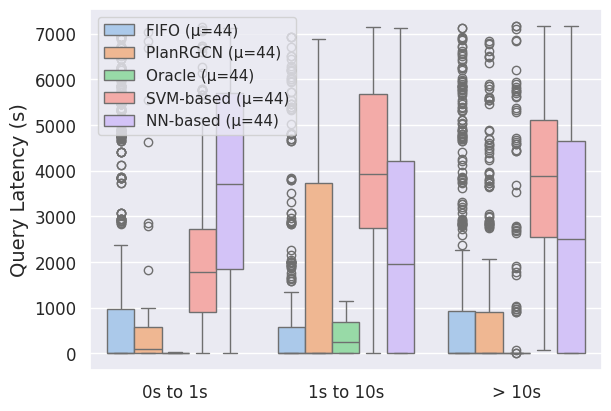

In [22]:

plot_box_latency_int(dbpedia, title='',time_intervals=['0s to 1s', '1s to 10s', '> 10s'], figsize=(6,4))

In [28]:
sns.color_palette('pastel',5)

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0)]

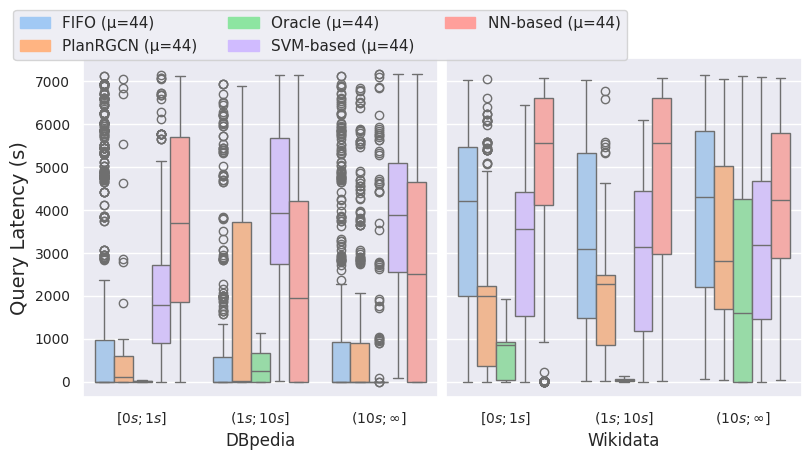

In [55]:
#from load_balance.post_process import plot_box_lat_int_comb
import load_balance.post_process as pp
import importlib
importlib.reload(pp)
plot_box_lat_int_comb = pp.plot_box_lat_int_comb
legend_dict= {
    'bbox_to_anchor':(0, 1.13),
    'ncol':3,
    }
int_to_col = { 'FIFO (μ=44)':'#a1c9f4','PlanRGCN (μ=44)':'#ffb482',  'Oracle (μ=44)':'#8de5a1', 'SVM-based (μ=44)':'#D0BBFF','NN-based (μ=44)':'#FF9F9B'}
save_path = "/PlanRGCN/query_lat_comb.png"
plot_box_lat_int_comb((dbpedia,'DBpedia'), 
                      (wikidata,'Wikidata'), 
                      figsize=(8,4), 
                      title='', 
                      time_intervals=['$[0s; 1s]$', '$(1s; 10s]$', '$(10s; \infty]$'],
                      legend_dict=legend_dict, int_to_col=int_to_col,
                      save_path = '/data/baseline_lb_bxp.pdf',
                      x_label_size=10,
                      x_rotation = 0,
                      y_label_size=10,
                      dpi=1600,
                      nrows=1
                      )

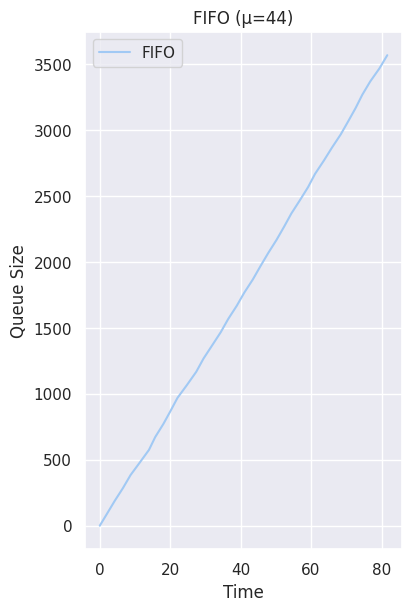

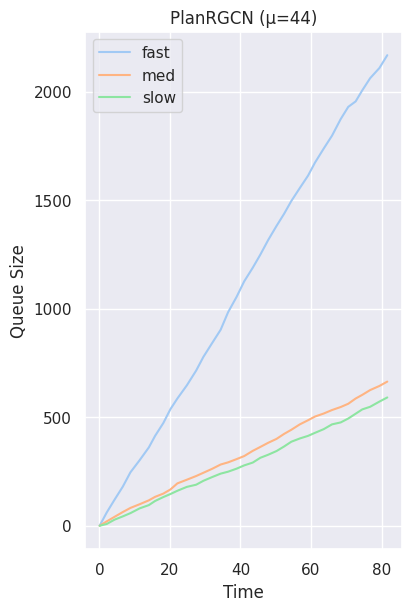

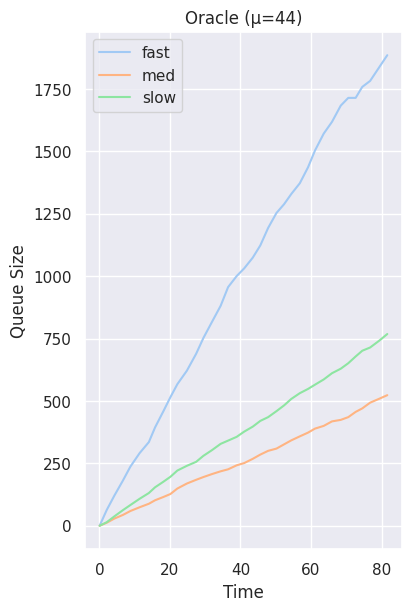

In [25]:
def get_queu_size(path):
    data = []
    for line in open(f'{path}/main_file.log').readlines():
        if '{' in line:
            data.append( ast.literal_eval('{'+line.split('{')[1]))
    return data
    
def plot_queu_size_helper(q_data, figsize=(4,6), title=None):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    try:
        for k in ['fast', 'med', 'slow']:
            ax = sns.lineplot(y=[q[k] for q in q_data], x=[q['time'] for q in q_data] , ax=ax, label=k)
    except:
        ax = sns.lineplot(y=[q['fifo'] for q in q_data], x=[q['time'] for q in q_data] , ax=ax, label='FIFO')
        
    ax.set_ylabel('Queue Size')
    ax.set_xlabel('Time')
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_queu_size(path, figsize=(4,6), title=None):
    q_data = get_queu_size(path)
    plot_queu_size_helper(q_data, figsize=figsize, title=title)

for k in path_data.keys():
    plot_queu_size(path_data[k], title = k)

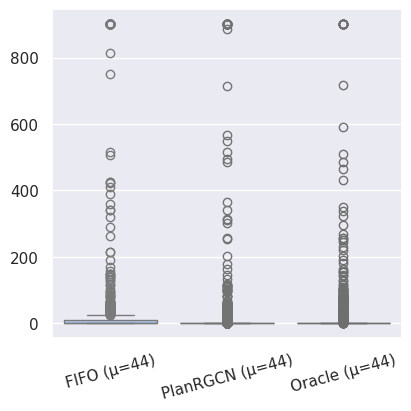

In [26]:
plot_box_ex_time(dbpedia)